In [39]:
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

In [47]:
m = 30
g = 10
alp = ALP(m,g)
ngc1275 = Source(z=0., ra='03h19m48.1s', dec='+41d30m42s')
EGeV = np.logspace(1., 3.5, 250)
pin = np.diag((1.,1.,0.)) * 0.5
ml = ModuleList(alp, ngc1275, pin = pin, EGeV = EGeV)

In [48]:
Btrans = np.array([1])
psi = np.array([0])
nel = np.array([1e-3])
dL = np.array([10])

In [49]:
ml.add_propagation("Array", 0, Btrans=Btrans, psi=psi, nel=nel, dL=dL)
#ml.add_propagation("EBL",1, model='dominguez') # EBL attenuation comes second, after beam has left cluster
#ml.add_propagation("GMF",2, model='jansson12') # finally, the beam enters the Milky Way Field

In [50]:
px, py, pa = ml.run()

In [51]:
py

array([[0.49972288, 0.49995079, 0.49926486, 0.49896898, 0.4996201 ,
        0.49998565, 0.49933488, 0.49871047, 0.49911907, 0.49989711,
        0.49979808, 0.49888059, 0.49837882, 0.49895342, 0.49983646,
        0.49986532, 0.49891911, 0.4980163 , 0.49812081, 0.49910596,
        0.49993519, 0.49973028, 0.49859623, 0.49747756, 0.49729465,
        0.4981783 , 0.49940621, 0.4999993 , 0.4994508 , 0.49805482,
        0.49666535, 0.4961182 , 0.49672003, 0.49809892, 0.49945179,
        0.49999981, 0.49938575, 0.49782365, 0.49596412, 0.49457657,
        0.49421282, 0.49499491, 0.4965942 , 0.49838218, 0.49967341,
        0.49996242, 0.49907646, 0.49720745, 0.49483117, 0.49255374,
        0.49093894, 0.49036532, 0.49094524, 0.49251625, 0.49469619,
        0.49698004, 0.49885169, 0.49988532, 0.49981844, 0.49858698,
        0.49632202, 0.4933147 , 0.48995959, 0.48668913, 0.48390998,
        0.48195035, 0.4810237 , 0.48121113, 0.48246175, 0.48460815,
        0.48739282, 0.49050088, 0.49359469, 0.49

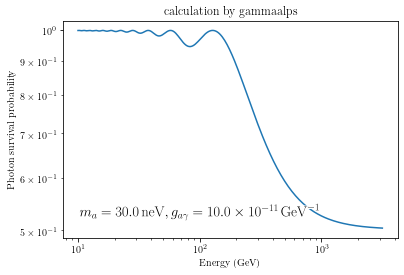

In [54]:
pgg = px + py # the total photon survival probability

effect = dict(path_effects=[withStroke(foreground="w", linewidth=2)])

for i, p in enumerate(pgg):  # plot all realizations
    plt.loglog(ml.EGeV, p, color=plt.cm.tab10(0.), alpha=1 if not i else 0.2)

plt.xlabel('Energy (GeV)')
plt.ylabel('Photon survival probability')

plt.annotate(r'$m_a = {0:.1f}\,\mathrm{{neV}}, g_{{a\gamma}}'
             r' = {1:.1f} \times 10^{{-11}}\,\mathrm{{GeV}}^{{-1}}$'.format(ml.alp.m, ml.alp.g),
             xy=(0.05,0.1),
             size ='x-large',
             xycoords='axes fraction',
             **effect)
plt.title('calculation by gammaalps')
plt.savefig('p_surv_gammaalps.png')

In [31]:
plt.plot(ml.modules['MixFromArray'].r, ml.moduls['Array'].B)

AttributeError: 'MixFromArray' object has no attribute 'r'

In [37]:
ml.__dict__.keys()

dict_keys(['_alp', '_source', '_EGeV', '_px', '_py', '_pa', '_pin', '_modules', '_seed', '_px_src', '_py_src', '_pa_src', '_px_final', '_py_final', '_pa_final', '_lin_pol', '_circ_pol', '_ModuleList__nsim_max', '_atten', '_eblnorm', '_Tenv', '_all_nsim'])

In [55]:
p_man = np.loadtxt('manual_prob.txt')

In [59]:
p_man.shape

(250,)

In [64]:
np.isclose(pgg[0], p_man, rtol=1e-1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

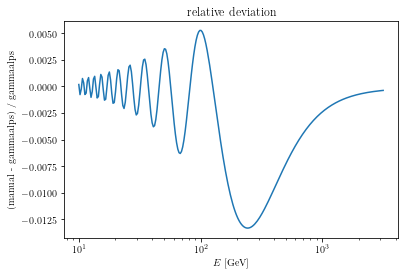

In [73]:
plt.plot(ml.EGeV, (p_man - pgg[0]) / pgg[0])
plt.xscale('log')
plt.title('relative deviation')
plt.ylabel('(manual - gammaalps) / gammaalps')
plt.xlabel('$E$ [GeV]')
plt.savefig('relative_deviation.png')